In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [35]:
colors = ["#6eccf4", "#F9A124"]
colors2 = ["#ff6b6b", "#5c7cfa"]

In [4]:
df1 = pd.read_excel("without.xlsx")
df2 = pd.read_excel("with.xlsx")

In [5]:
questions = list(df1.columns[2:-2])
df1 = df1[questions]
df2 = df2[questions]
revsered_questions = ["While I was reading the narrative, activity going on in the room around me was on my mind.",
                     "I found my mind wandering while reading the narrative."]
words_questions = ['Which plot of this story prompted you to reflect on the handling of events in your past experience, and how did it promote it? What exactly happened?',
                     'What plot of this story prompted you to think about how you can deal with people in the future? Which plots and how were they promoted?']
df2[revsered_questions[0]] = df2[revsered_questions[0]].apply(lambda x:8-x)
df2[revsered_questions[1]] = df2[revsered_questions[1]].apply(lambda x:8-x)

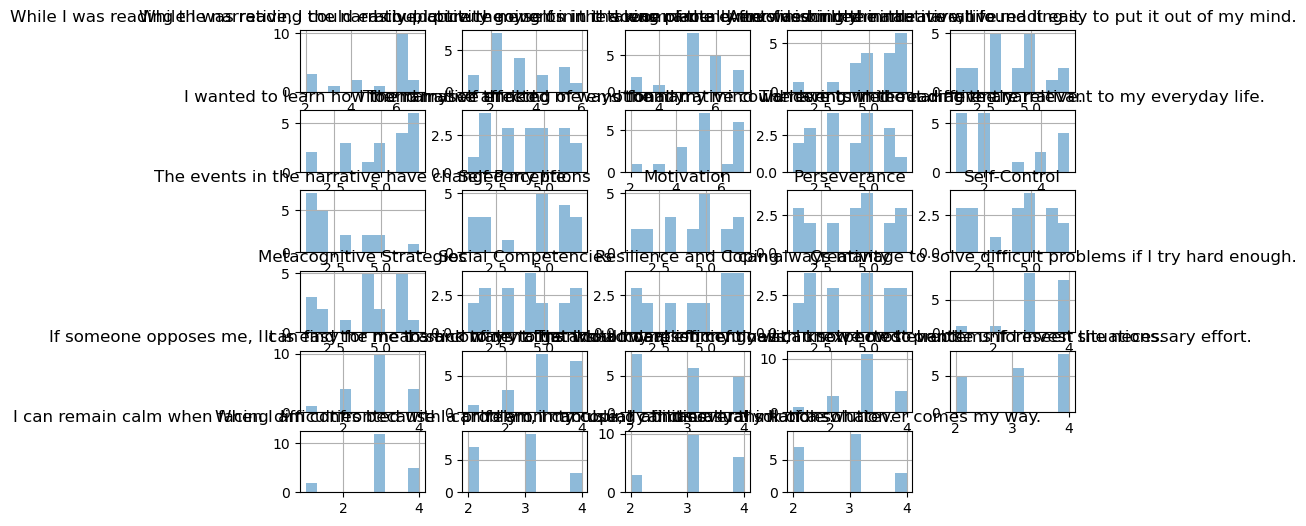

In [4]:
df2.hist(alpha=0.5, figsize=(10, 6))
plt.show()

# tests

对于比较对照组和实验组在量表数据（程度从1到7）上的差异，可以使用以下几种统计检验方法：

(1)独立样本t检验（Independent Samples t-Test）：如果你的数据满足正态分布，并且两组的方差相等（可以用Levene's Test检验方差齐性），那么可以使用独立样本t检验。这种检验适用于比较两组独立样本的平均值。

(2)Mann-Whitney U检验：如果你的数据不满足正态分布，可以使用Mann-Whitney U检验，这是一种非参数检验，用于比较两个独立样本的中位数。

(3)Wilcoxon秩和检验：这也是一种非参数检验，适用于当数据不满足正态分布时，比较两个相关或配对样本的差异。

(4)方差分析（ANOVA）：如果你的实验设计包括多于两个组，可以考虑使用单因素或多因素方差分析。如果数据不满足正态分布，可以考虑使用Kruskal-Wallis H检验（多个独立样本的非参数检验方法）。

在选择检验方法时，需要考虑数据的分布特性（是否正态分布）、样本的独立性、以及样本大小。如果不确定哪种检验最合适，可以先进行数据的描述性统计和正态性检验。同时，也可以考虑咨询统计专家。

In [6]:
test_methods = {"t-test":stats.ttest_ind, "Mann-Whitney":stats.mannwhitneyu, "wilcoxon":stats.wilcoxon}

In [6]:
def test_p(column_name, test_method):
    control_group, experimental_group = df1[column_name], df2[column_name]
    t_statistic, p_value = test_method(control_group, experimental_group)
    return t_statistic, p_value 

In [7]:
# t_test
def stats_df(test_method):
    statistics = []
    p_values = []
    for i in range(len(questions)):
        statistic, p_value = test_p(questions[i], test_method)
        statistics.append(statistic)
        p_values.append(p_value)
        # print(questions[i])
        # print("   statistic:", t_statistic, "   p_value:", p_value)
        # print()
    df_test = pd.DataFrame({"question":questions,"statistics":statistics, "p_values":p_values})
    return df_test

In [9]:
df_u_test = stats_df(stats.mannwhitneyu)
df_u_test[df_u_test["p_values"] < 0.05]

,question,statistics,p_values
1,"While I was reading the narrative, activity go...",251.5,0.013225


In [10]:
df_u_test[df_u_test["p_values"] < 0.10]

,question,statistics,p_values
1,"While I was reading the narrative, activity go...",251.5,0.013225
8,I found my mind wandering while reading the na...,224.5,0.097662


In [11]:
df_u_test[df_u_test["p_values"] < 0.10]

,question,statistics,p_values
1,"While I was reading the narrative, activity go...",251.5,0.013225
8,I found my mind wandering while reading the na...,224.5,0.097662


[3.44444444 3.55555556 3.77777778 3.61111111 3.44444444 3.66666667
 3.55555556 4.11111111 3.44444444]   [0.0, 0.7853981633974483, 1.5707963267948966, 2.356194490192345, 3.141592653589793, 3.9269908169872414, 4.71238898038469, 5.497787143782138, 0.0]
[4.31578947 4.26315789 4.10526316 4.         4.05263158 4.
 4.36842105 4.10526316 4.31578947]   [0.0, 0.7853981633974483, 1.5707963267948966, 2.356194490192345, 3.141592653589793, 3.9269908169872414, 4.71238898038469, 5.497787143782138, 0.0]


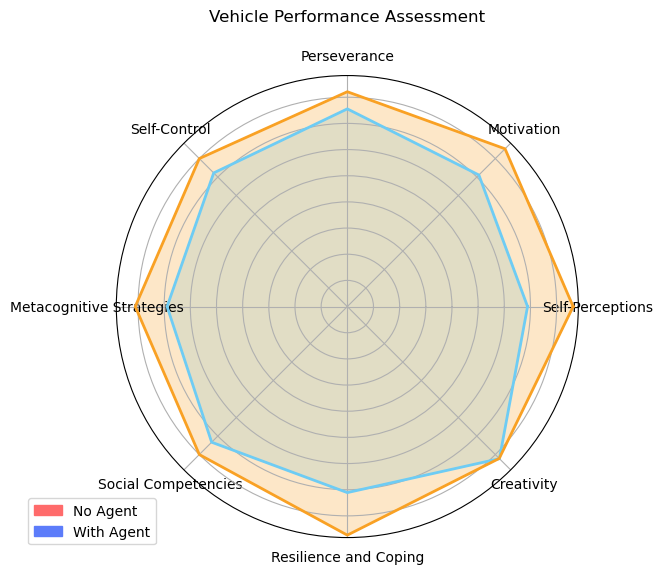

In [36]:
qs = ['Self-Perceptions',
 'Motivation',
 'Perseverance',
 'Self-Control',
 'Metacognitive Strategies',
 'Social Competencies',
 'Resilience and Coping',
 'Creativity']
labels=np.array(qs)
data1=[df1[q].mean() for q in qs]
data2=[df2[q].mean() for q in qs]
# data2=np.array([df_nar_sage["Narrativity_Overall"].mean(),
#                 df_nar_sage["Narrativity_Staging"].mean(),
#                 df_nar_sage["Narrativity_PlotProg"].mean(),
#                 df_nar_sage["Narrativity_CogTension"].mean(),
#                ])


def draw_radar(labels, *datas):
    # Create radar plot
    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()
    angles+=angles[:1]

    # The plot is circular, so we need to "complete the loop" and append the start to the end.
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    count = 0
    for data in datas:
        count += 1
        processed_data=np.concatenate((data,[data[0]]))
        
        print(processed_data, " ", angles)
        ax.fill(angles, processed_data, color=colors[count-1], alpha=0.25)
        ax.plot(angles, processed_data, color=colors[count-1], linewidth=2)  # Change the color if needed

    # Labels for each point
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)

    # Title of the plot
    ax.set_title('Vehicle Performance Assessment', y=1.1)

    legend_patches = [
        mpatches.Patch(color=colors2[0], label='No Agent'),
        mpatches.Patch(color=colors2[1], label='With Agent')
    ]
    ax.legend(handles=legend_patches, loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.show()
draw_radar(labels, data1, data2)

In [24]:
for q in questions2:
     print(stats.mannwhitneyu(df1[q], df2[q]))

MannwhitneyuResult(statistic=124.5, pvalue=0.15608193605456638)
MannwhitneyuResult(statistic=132.0, pvalue=0.23586664482279296)
MannwhitneyuResult(statistic=154.5, pvalue=0.6221920535955581)
MannwhitneyuResult(statistic=150.5, pvalue=0.5379390508877482)
MannwhitneyuResult(statistic=143.0, pvalue=0.3948219034954289)
MannwhitneyuResult(statistic=154.0, pvalue=0.6114388679609971)
MannwhitneyuResult(statistic=134.0, pvalue=0.2620523843808368)
MannwhitneyuResult(statistic=169.5, pvalue=0.9754466693928271)


In [16]:
questions1 = ['While I was reading the narrative, I could easily picture the events in it taking place.',
 'While I was reading the narrative, activity going on in the room around me was on my mind.',
 'I could picture myself in the scene of the events described in the narrative.',
 'I was mentally involved in the narrative while reading it.',
 'After finishing the narrative, I found it easy to put it out of my mind.',
 'I wanted to learn how the narrative ended.',
 'The narrative affected me emotionally.',
 'I found myself thinking of ways the narrative could have turned out differently.',
 'I found my mind wandering while reading the narrative.',
 'The events in the narrative are relevant to my everyday life.',
 'The events in the narrative have changed my life.']

questions2 = ['Self-Perceptions',
 'Motivation',
 'Perseverance',
 'Self-Control',
 'Metacognitive Strategies',
 'Social Competencies',
 'Resilience and Coping',
 'Creativity']

In [51]:
df1[questions1].std()

While I was reading the narrative, I could easily picture the events in it taking place.      1.640979
While I was reading the narrative, activity going on in the room around me was on my mind.    1.756408
I could picture myself in the scene of the events described in the narrative.                 1.719743
I was mentally involved in the narrative while reading it.                                    1.748949
After finishing the narrative, I found it easy to put it out of my mind.                      1.940285
I wanted to learn how the narrative ended.                                                    1.936914
The narrative affected me emotionally.                                                        1.363626
I found myself thinking of ways the narrative could have turned out differently.              1.790498
I found my mind wandering while reading the narrative.                                        1.465285
The events in the narrative are relevant to my everyday life.            

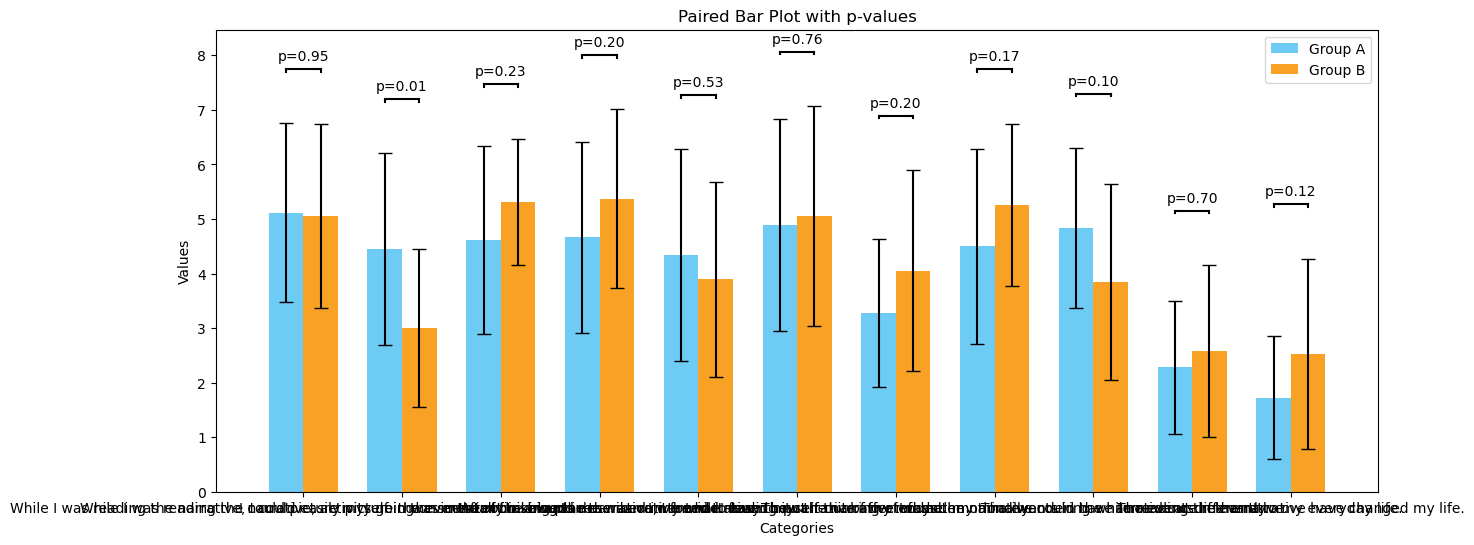

In [83]:
def draw_p_value(df1, df2, columns, test_method, margin_top=None):
    categories = columns
    values_a = df1[columns].mean()
    values_b = df2[columns].mean()
    std_a =  df1[columns].std()
    std_b =  df2[columns].std()

    # P-values for each pair of bars
    p_values = []
    for q in columns:
        t_statistic, p_value = test_method(df1[q], df2[q])
        p_values.append(p_value)

    plt.figure(figsize=(15, 6))
        
    # The x position of bars
    bar_width = 0.35
    index = np.arange(len(categories))

    # Plotting the bars with error bars
    bar1 = plt.bar(index, values_a, bar_width, label='Group A', yerr=std_a, capsize=5, color=colors[0])
    bar2 = plt.bar(index + bar_width, values_b, bar_width, label='Group B', yerr=std_b, capsize=5, color=colors[1])

    # Adding labels and title
    plt.xlabel('Categories')
    plt.ylabel('Values')
    plt.title('Paired Bar Plot with p-values')
    # plt.set_xticks(index + bar_width / 2)
    plt.xticks(index + bar_width / 2, categories)
    plt.legend()

    # Function to add p-value annotations with small vertical lines
    if margin_top == None:
        margin_top = max(max(std_a),max(std_b))*1.5
    def add_pvalue_annotations(bar1, bar2, p_values):

        for i in range(len(bar1)):
            bar1_x = bar1[i].get_x() + bar1[i].get_width() / 2
            bar2_x = bar2[i].get_x() + bar2[i].get_width() / 2
            center_x = (bar1_x + bar2_x) / 2
            top = max(bar1[i].get_height() + std_a[i], bar2[i].get_height() + std_b[i])
            # top = margin_top
            p = p_values[i]

            # Draw the small vertical line at each end
            vertical_height = 0.05
            plt.plot([bar1_x, bar1_x], [top+margin_top, top +margin_top -vertical_height], color='black')
            plt.plot([bar2_x, bar2_x], [top+margin_top, top +margin_top - vertical_height], color='black')

            # Connect the vertical lines with a horizontal line
            plt.plot([bar1_x, bar2_x], [top + margin_top, top + margin_top], color='black')

            # Add the p-value text
            plt.text(center_x, top + margin_top + 2*vertical_height, f'p={p:.2f}', ha='center', va='bottom')

    # Add p-value annotations with small vertical lines
    add_pvalue_annotations(bar1, bar2, p_values)

    # Show the plot
    plt.show()

draw_p_value(df1, df2, questions1, stats.mannwhitneyu, 1)

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

def draw_p_value(df1, df2, columns, test_method, margin_side=None, legends=["Group A", "Group B"], xlim = (0,9), horizontal_height=0.3):
    categories = columns
    values_a = df1[columns].mean()
    values_b = df2[columns].mean()
    std_a =  df1[columns].std()
    std_b =  df2[columns].std()

    # P-values for each pair of bars
    p_values = []
    for q in columns:
        t_statistic, p_value = test_method(df1[q], df2[q])
        p_values.append(p_value)

    plt.figure(figsize=(6, 8))
    plt.xlim(xlim[0], xlim[1])
        
    # The y position of bars
    bar_height = 0.35
    index = np.arange(len(categories))

    # Plotting the horizontal bars with error bars
    bar1 = plt.barh(index, values_a, bar_height, label=legends[0], xerr=std_a, capsize=5,  color=colors[0])
    bar2 = plt.barh(index + bar_height, values_b, bar_height, label=legends[1], xerr=std_b, capsize=5,  color=colors[1])

    # Adding labels and title
    plt.ylabel('Questions')
    plt.xlabel('Average Scales')
    plt.title('Paired Horizontal Bar Plot with p-values')
    plt.yticks(index + bar_height / 2, categories)
    # plt.legend()

    # Function to add p-value annotations with small vertical lines
    if margin_side == None:
        margin_side = max(max(std_a), max(std_b)) * 1.5
    def add_pvalue_annotations(bar1, bar2, p_values):
        for i in range(len(bar1)):
            bar1_y = bar1[i].get_y() + bar1[i].get_height() / 2
            bar2_y = bar2[i].get_y() + bar2[i].get_height() / 2
            center_y = (bar1_y + bar2_y) / 2
            right = max(bar1[i].get_width() + std_a[i], bar2[i].get_width() + std_b[i])
            p = p_values[i]

            # Draw the small vertical line at each end
            plt.plot([right + margin_side, right + margin_side - horizontal_height], [bar1_y, bar1_y], color='black')
            plt.plot([right + margin_side, right + margin_side - horizontal_height], [bar2_y, bar2_y], color='black')

            # Connect the vertical lines with a horizontal line
            plt.plot([right + margin_side, right + margin_side], [bar1_y, bar2_y], color='black')

            # Add the p-value text
            plt.text(right + margin_side + 2 * horizontal_height, center_y, f'p={p:.2f}', ha='center', va='center')

    # Add p-value annotations with small vertical lines
    add_pvalue_annotations(bar1, bar2, p_values)

    # Show the plot
    plt.grid(True)
    plt.show()

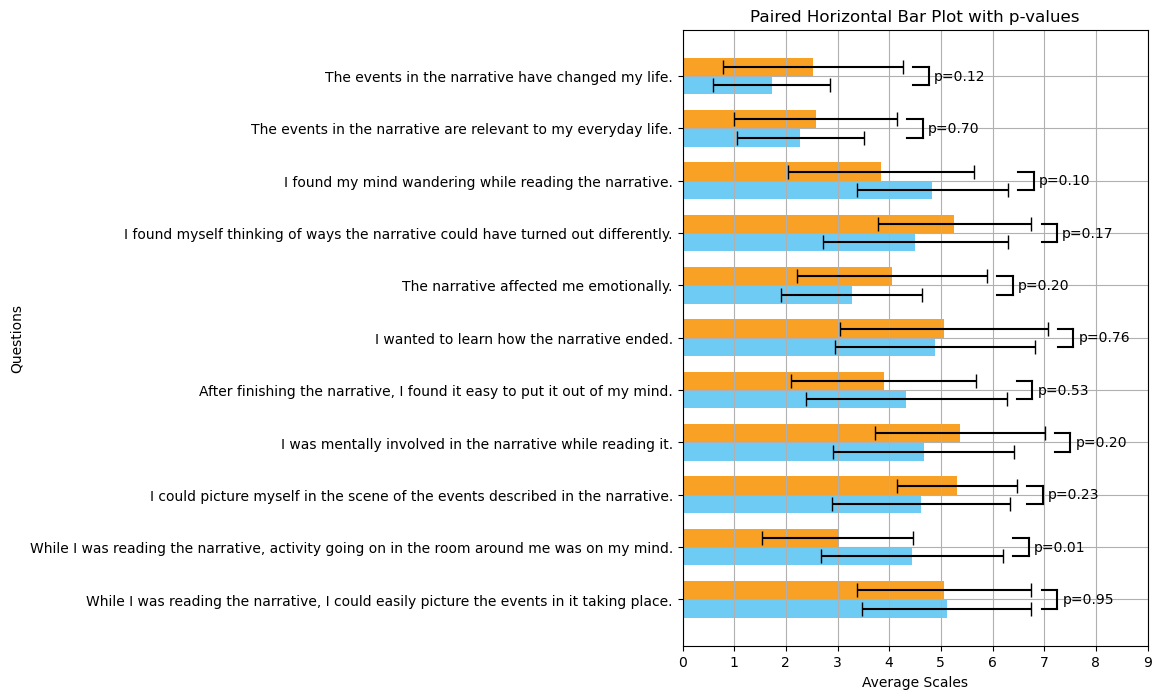

In [38]:
draw_p_value(df1, df2, questions1, stats.mannwhitneyu, 0.5, legends=["Without Agent", "With Agent"])

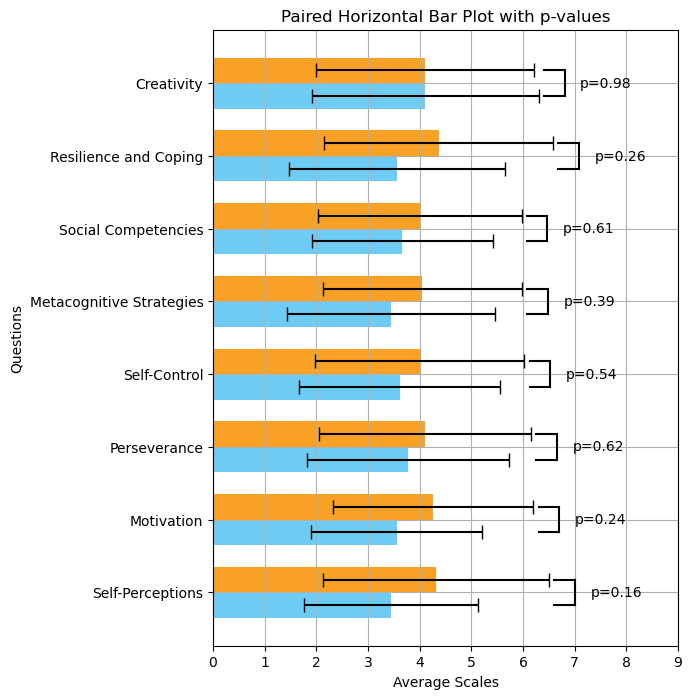

In [19]:
draw_p_value(df1, df2, questions2, stats.mannwhitneyu, 0.5, legends=["With Agent", "Without Agent"], xlim=(0,9), horizontal_height=0.4)